In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-10-years-stock-market-data/1_train.csv
/kaggle/input/last-10-years-stock-market-data/4_train.csv
/kaggle/input/last-10-years-stock-market-data/3_train.csv
/kaggle/input/last-10-years-stock-market-data/test.csv
/kaggle/input/last-10-years-stock-market-data/2_train.csv


In [43]:
# Load Train and Test data
train_size = 4
train_data = []
for i in range(train_size):
    train_data.append(pd.read_csv("/kaggle/input/last-10-years-stock-market-data/{}_train.csv".format(i+1)))
    
test_data = pd.read_csv("/kaggle/input/last-10-years-stock-market-data/test.csv")


In [58]:
# Print relavent meta data for display

def print_info(train_data, label):
    print("Train Data {} HEAD TAIL".format(label))
    print(train_data.head())
    print(train_data.tail())
    print(train_data.columns)
    print(train_data.shape)
    print()

for i in range(train_size):
    print_info(train_data[i], i+1)

Train Data 1 HEAD TAIL
         Date  Open  High   Low  Close  Adj Close        Volume
0  2010-06-29  9.50  9.47  9.23   9.12       7.93  1.133345e+09
1  2010-06-30  9.25  9.22  9.00   9.04       7.52  7.394520e+08
2  2010-07-01  9.01  9.02  8.63   8.70       7.45  1.022896e+09
3  2010-07-02  8.98  8.96  8.74   8.94       7.68  6.938428e+08
4  2010-07-06  9.13  9.13  8.61   8.85       7.68  6.152356e+08
            Date   Open   High    Low  Close  Adj Close       Volume
2526  2020-07-13  97.41  99.85  95.33  95.53      93.98  191649200.0
2527  2020-07-14  94.81  97.15  93.66  97.02      95.63  170989200.0
2528  2020-07-15  99.06  99.18  96.41  97.58      96.28  153198000.0
2529  2020-07-16  96.49  97.55  95.94  96.67      95.18  110577600.0
2530  2020-07-17  97.01  97.15  95.86  96.17      94.73   92186800.0
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(2531, 7)

Train Data 2 HEAD TAIL
         Date  Open  High   Low  Close  Adj Close       Vo

In [44]:
df = train_data[1].copy()

import datetime

def str_to_datetime(date, fmt=210):
    ld = date.split('-')
    year, month, day = int(ld[0]), int(ld[1]), int(ld[2])
    
    if(fmt==12):
        year, day = day, year

    return datetime.datetime(year=year, month=month, day=day)


df['Date'] = df['Date'].apply(str_to_datetime)
# df['Date'] = df['Date'].apply(str_to_datetime, fmt=12)

df.index = df.pop('Date')

In [28]:
# for idx,row in df.iterrows():
#     print(idx, row['Date'], row['Open'], row['Low'], row['High'], row['Close'])

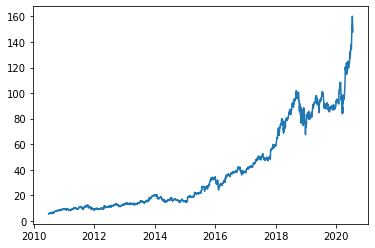

In [53]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [73]:
import numpy as np
 
feedback_length = 5
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

        ret_df['Target'] = Y

    return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2010-07-17', 
                                '2020-07-17', 
                                n=12)
windowed_df

,Target Date,Target-12,Target,Target-11,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1
0,2010-07-17,5.44,5.98,5.49,5.38,5.45,5.54,5.67,5.86,5.82,5.76,6.15,6.13,6.10
1,2010-07-20,5.38,5.99,5.45,5.54,5.67,5.86,5.82,5.76,6.15,6.13,6.10,5.98,5.85
2,2010-07-21,5.45,5.89,5.54,5.67,5.86,5.82,5.76,6.15,6.13,6.10,5.98,5.85,5.99
3,2010-07-22,5.54,5.98,5.67,5.86,5.82,5.76,6.15,6.13,6.10,5.98,5.85,5.99,5.89
4,2010-07-23,5.67,6.03,5.86,5.82,5.76,6.15,6.13,6.10,5.98,5.85,5.99,5.89,5.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-07-13,136.64,155.17,137.66,134.68,134.03,137.98,143.79,144.55,152.94,149.88,154.14,159.13,160.16
2514,2020-07-14,137.66,154.22,134.68,134.03,137.98,143.79,144.55,152.94,149.88,154.14,159.13,160.16,155.17
2515,2020-07-15,134.68,150.41,134.03,137.98,143.79,144.55,152.94,149.88,154.14,159.13,160.16,155.17,154.22
2516,2020-07-16,134.03,150.04,137.98,143.79,144.55,152.94,149.88,154.14,159.13,160.16,155.17,154.22,150.41


In [77]:
def windowed_df_to_date_X_y(windowed_df):
    df_as_np = windowed_df.to_numpy()
    
    dates = df_as_np[:,0]
    middle = df_as_np[:,1:-1]
    y  = df_as_np[:,-1]
    
    X = middle.reshape((len(dates), middle.shape[1], 1)) # 3rd parameter is the vector dimnesion
    #change 1 to more if other variables apart from close are used
    
    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
    

In [80]:
X.shape, dates.shape, y.shape

((2518, 12, 1), (2518,), (2518,))

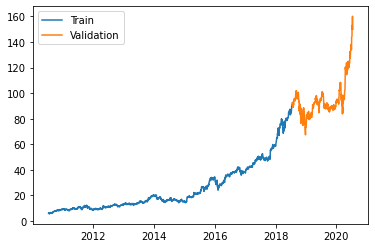

In [86]:
q_80 = int(len(dates)*0.8)
q_90 = int(len(dates)*0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:], X[q_80:], y[q_80:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)

plt.legend(['Train', 'Validation', 'Test'])

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Change 64 to optimize for testing accuracy

model = Sequential([layers.Input((12,1)), 
                    layers.LSTM(64), 
                    layers.Dense(32, activation='relu'), 
                    layers.Dense(32, activation='relu'), 
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

2023-02-12 21:49:35.954133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
63/63 [==============================] - 4s 22ms/step - loss: 703.9481 - mean_absolute_error: 18.8520 - val_loss: 5846.7847 - val_mean_absolute_error: 74.7790
Epoch 2/100
63/63 [==============================] - 1s 11ms/step - loss: 154.2961 - mean_absolute_error: 7.0164 - val_loss: 1189.0133 - val_mean_absolute_error: 30.9344
Epoch 3/100
63/63 [==============================] - 1s 13ms/step - loss: 3.7348 - mean_absolute_error: 0.7767 - val_loss: 454.8151 - val_mean_absolute_error: 15.4172
Epoch 4/100
63/63 [==============================] - 1s 12ms/step - loss: 1.2615 - mean_absolute_error: 0.5782 - val_loss: 370.7747 - val_mean_absolute_error: 12.9669
Epoch 5/100
63/63 [==============================] - 1s 12ms/step - loss: 0.7163 - mean_absolute_error: 0.4879 - val_loss: 328.7610 - val_mean_absolute_error: 11.4846
Epoch 6/100
63/63 [==============================] - 1s 13ms/step - loss: 0.6292 - mean_absolute_error: 0.4919 - val_loss: 307.3169 - val_mean_absolute_error:

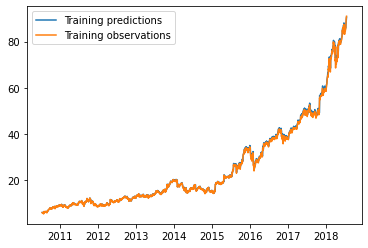

In [91]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training predictions', 'Training observations'])